#Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow.parquet as pq

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pq.read_table('/content/drive/MyDrive/project/PORTODATA/DSLS/yellow_tripdata_2021-09.parquet')
data = data.to_pandas()
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2021-09-01 06:04:34,2021-09-01 06:15:28,2.0,4.90,1.0,N,87,229,1,16.0,0.5,0.5,2.00,0.00,0.3,21.80,2.5,0.0
1,2,2021-09-01 06:26:31,2021-09-01 06:32:39,1.0,1.13,1.0,N,162,229,1,6.0,0.5,0.5,1.96,0.00,0.3,11.76,2.5,0.0
2,2,2021-09-01 06:36:15,2021-09-01 06:40:30,2.0,1.37,1.0,N,141,262,1,6.0,0.5,0.5,1.96,0.00,0.3,11.76,2.5,0.0
3,1,2021-09-01 00:00:15,2021-09-01 00:18:34,2.0,6.50,1.0,N,90,260,2,21.0,3.0,0.5,0.00,6.55,0.3,31.35,2.5,0.0
4,2,2021-09-01 00:44:54,2021-09-01 00:56:33,1.0,2.32,1.0,N,75,238,2,10.5,0.5,0.5,0.00,0.00,0.3,11.80,0.0,0.0


#Data Understanding

* sdstpep_pickup_datetime = Tanggal dan waktu ketika agrometer diaktifkan
* tpep_dropoff_datetime	= Tanggal dan waktu ketika agrometer dinonaktifkan
* fare_amount = Tarif waktu dan jarak dihitung dengan agrometer
* passenger_count = Jumlah penumpang di dalam kendaraan
* trip_distance = Jarak perjalanan yang telah berlalu dalam mil
* total_amount = Jumlah total yang dibebankan kepada penumpang. Tidak termasuk tip uang tunai

'PULocationID' dan 'DOLocationID'
* Zona Taksi TLC di mana Argometer diaktifkan (PU/PickUp)
* Zona Taksi TLC di mana Argometer dinonaktifkan (DO/DropOff)

In [4]:
data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2963793 entries, 0 to 2963792
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

#Data Preprocessing

##Treat Missing Value

`persentase missing value dalam setiap fitur`

In [5]:
(data.isna().mean()*100).sort_values(ascending=False).head(25)

airport_fee              4.819972
congestion_surcharge     4.819972
passenger_count          4.819972
RatecodeID               4.819972
store_and_fwd_flag       4.819972
extra                    0.000000
total_amount             0.000000
improvement_surcharge    0.000000
tolls_amount             0.000000
tip_amount               0.000000
mta_tax                  0.000000
VendorID                 0.000000
fare_amount              0.000000
tpep_pickup_datetime     0.000000
DOLocationID             0.000000
PULocationID             0.000000
trip_distance            0.000000
tpep_dropoff_datetime    0.000000
payment_type             0.000000
dtype: float64

*karena terdapat 4 variabel numerik maka akan diperiksa distribusinya untuk menentukan metode imputasi*

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 8 Text major ticklabel objects>)

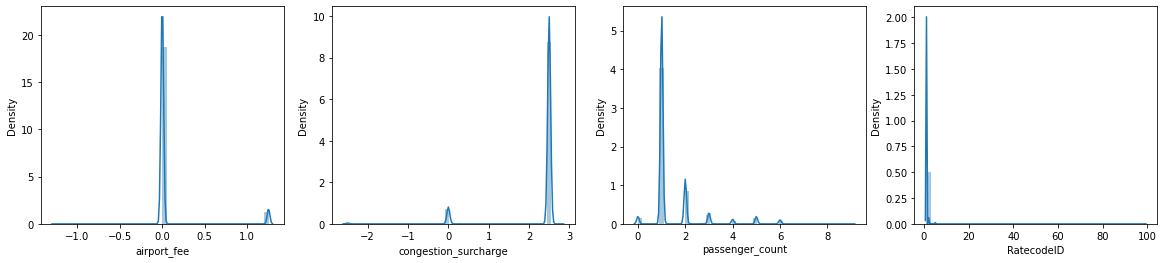

In [6]:
plt.figure(figsize=(20,4))

ax = plt.subplot(141)
sns.distplot(data['airport_fee'],ax=ax)
plt.xticks(rotation='0')

ax = plt.subplot(142)
sns.distplot(data['congestion_surcharge'],ax=ax)
plt.xticks(rotation='0')

ax = plt.subplot(143)
sns.distplot(data['passenger_count'],ax=ax)
plt.xticks(rotation='0')

ax = plt.subplot(144)
sns.distplot(data['RatecodeID'],ax=ax)
plt.xticks(rotation='0')

*dari distribusi maka metode imputasi paling sesuai adalah modus*

`variabel numerik dan kategori diisi dengan modus`

In [7]:
missing_values = data.isna().mean()*100
col_missingvalues = missing_values[missing_values > 0].index

for i in col_missingvalues:
  data.loc[data.loc[:,i].isna(),i] = data.loc[:,i].mode()[0]

data.isna().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
dtype: int64

##Treat Data Abnormal

####NUMERIK

In [8]:
data.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
VendorID,2963793.0,1.719343,0.532767,1.00,1.0,2.00,2.00,6.00
passenger_count,2963793.0,1.403410,1.004746,0.00,1.0,1.00,1.00,9.00
trip_distance,2963793.0,6.583621,656.703823,0.00,1.1,1.90,3.49,317182.45
RatecodeID,2963793.0,1.111538,2.417161,1.00,1.0,1.00,1.00,99.00
PULocationID,2963793.0,164.218716,66.351358,1.00,125.0,162.00,234.00,265.00
DOLocationID,2963793.0,161.933085,70.736823,1.00,112.0,162.00,234.00,265.00
payment_type,2963793.0,1.180439,0.524786,0.00,1.0,1.00,1.00,4.00
fare_amount,2963793.0,14.450455,475.484248,-474.00,7.0,10.00,16.00,818283.44
extra,2963793.0,1.042887,1.251067,-5.50,0.0,0.50,2.50,9.55
mta_tax,2963793.0,0.492353,0.076201,-0.50,0.5,0.50,0.50,3.30


*ditemukan kejanggalan adanya `BIAYA, BIAYA TAMBAHAN, TARIF WAKTU DAN JARAK, PAJAK` bernilai negatif*

`periksa durasi perjalanan`

In [9]:
data["duration"] = (data["tpep_dropoff_datetime"] - data["tpep_pickup_datetime"]).dt.total_seconds()
data["duration"].describe()

count    2.963793e+06
mean     1.050091e+03
std      3.485762e+03
min     -2.530000e+02
25%      4.330000e+02
50%      7.110000e+02
75%      1.143000e+03
max      5.106520e+05
Name: duration, dtype: float64

*akan dihapus data dengan nilai duration < 1*

In [10]:
data = data[data["duration"] >= 1] #time by seconds
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,2,2021-09-01 06:04:34,2021-09-01 06:15:28,2.0,4.90,1.0,N,87,229,1,16.0,0.5,0.5,2.00,0.00,0.3,21.80,2.5,0.0,654.0
1,2,2021-09-01 06:26:31,2021-09-01 06:32:39,1.0,1.13,1.0,N,162,229,1,6.0,0.5,0.5,1.96,0.00,0.3,11.76,2.5,0.0,368.0
2,2,2021-09-01 06:36:15,2021-09-01 06:40:30,2.0,1.37,1.0,N,141,262,1,6.0,0.5,0.5,1.96,0.00,0.3,11.76,2.5,0.0,255.0
3,1,2021-09-01 00:00:15,2021-09-01 00:18:34,2.0,6.50,1.0,N,90,260,2,21.0,3.0,0.5,0.00,6.55,0.3,31.35,2.5,0.0,1099.0
4,2,2021-09-01 00:44:54,2021-09-01 00:56:33,1.0,2.32,1.0,N,75,238,2,10.5,0.5,0.5,0.00,0.00,0.3,11.80,0.0,0.0,699.0


In [11]:
data[data['fare_amount']<0].head() #time by minutes

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
666,2,2021-09-01 00:12:46,2021-09-01 00:16:13,2.0,0.66,1.0,N,144,231,4,-4.5,-0.5,-0.5,0.0,0.00,-0.3,-8.3,-2.5,0.00,207.0
703,2,2021-09-01 00:04:28,2021-09-01 00:21:29,1.0,4.69,1.0,N,170,238,4,-16.0,-0.5,-0.5,0.0,0.00,-0.3,-19.8,-2.5,0.00,1021.0
735,2,2021-09-01 00:28:49,2021-09-01 00:43:44,2.0,8.42,1.0,N,138,262,4,-24.5,-0.5,-0.5,0.0,-6.55,-0.3,-36.1,-2.5,-1.25,895.0
959,2,2021-09-01 00:08:22,2021-09-01 00:10:31,1.0,0.37,1.0,N,68,68,4,-3.5,-0.5,-0.5,0.0,0.00,-0.3,-7.3,-2.5,0.00,129.0
1013,2,2021-09-01 00:14:36,2021-09-01 00:18:49,1.0,0.91,1.0,N,237,229,4,-5.0,-0.5,-0.5,0.0,0.00,-0.3,-8.8,-2.5,0.00,253.0


In [12]:
data[data['total_amount']<0].head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
666,2,2021-09-01 00:12:46,2021-09-01 00:16:13,2.0,0.66,1.0,N,144,231,4,-4.5,-0.5,-0.5,0.0,0.00,-0.3,-8.3,-2.5,0.00,207.0
703,2,2021-09-01 00:04:28,2021-09-01 00:21:29,1.0,4.69,1.0,N,170,238,4,-16.0,-0.5,-0.5,0.0,0.00,-0.3,-19.8,-2.5,0.00,1021.0
735,2,2021-09-01 00:28:49,2021-09-01 00:43:44,2.0,8.42,1.0,N,138,262,4,-24.5,-0.5,-0.5,0.0,-6.55,-0.3,-36.1,-2.5,-1.25,895.0
959,2,2021-09-01 00:08:22,2021-09-01 00:10:31,1.0,0.37,1.0,N,68,68,4,-3.5,-0.5,-0.5,0.0,0.00,-0.3,-7.3,-2.5,0.00,129.0
1013,2,2021-09-01 00:14:36,2021-09-01 00:18:49,1.0,0.91,1.0,N,237,229,4,-5.0,-0.5,-0.5,0.0,0.00,-0.3,-8.8,-2.5,0.00,253.0


In [13]:
data[data['fare_amount']>1440].head() #waktu perjalanan lebih dari 1 Hari atau 1440 menit

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
394006,1,2021-09-05 18:50:21,2021-09-05 19:01:59,1.0,2.5,1.0,N,141,107,3,818283.44,2.5,0.5,0.0,0.0,0.3,818286.74,2.5,0.0,698.0


diduga kesalahan input maka akan dilakukan fungsi mutlak pada variabel `BIAYA, BIAYA TAMBAHAN, TARIF WAKTU DAN JARAK, PAJAK`

In [14]:
col = []

for i in data.select_dtypes(include=np.number).columns:
  if data[i].min() < 0:
    col.append(i)

for i in col:
  data[i] = data[i].abs()

data.describe(include=np.number).loc[['min']]

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
min,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


*akan dihapus data dengan jumlah penumpang = 0*

In [15]:
data = data[data["passenger_count"] > 0]
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,2,2021-09-01 06:04:34,2021-09-01 06:15:28,2.0,4.90,1.0,N,87,229,1,16.0,0.5,0.5,2.00,0.00,0.3,21.80,2.5,0.0,654.0
1,2,2021-09-01 06:26:31,2021-09-01 06:32:39,1.0,1.13,1.0,N,162,229,1,6.0,0.5,0.5,1.96,0.00,0.3,11.76,2.5,0.0,368.0
2,2,2021-09-01 06:36:15,2021-09-01 06:40:30,2.0,1.37,1.0,N,141,262,1,6.0,0.5,0.5,1.96,0.00,0.3,11.76,2.5,0.0,255.0
3,1,2021-09-01 00:00:15,2021-09-01 00:18:34,2.0,6.50,1.0,N,90,260,2,21.0,3.0,0.5,0.00,6.55,0.3,31.35,2.5,0.0,1099.0
4,2,2021-09-01 00:44:54,2021-09-01 00:56:33,1.0,2.32,1.0,N,75,238,2,10.5,0.5,0.5,0.00,0.00,0.3,11.80,0.0,0.0,699.0


In [16]:
data = data[data['fare_amount'] < 1440] #1 day by minutes

In [17]:
data = data[data['duration'] < 86400] #1 day by seconds

In [18]:
data = data[data['trip_distance'] < 5000] #1 day by mil distance

####NON NUMERIK

In [19]:
data.describe(exclude=np.number).T

<ipython-input-19-ae7b888b9264>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(exclude=np.number).T


,count,unique,top,freq,first,last
tpep_pickup_datetime,2885642,1545771,2021-09-10 16:56:00,14,2003-01-03 12:54:36,2098-09-11 02:23:31
tpep_dropoff_datetime,2885642,1545197,2021-09-04 00:00:00,32,2003-01-04 09:35:38,2098-09-11 02:52:04
store_and_fwd_flag,2885642,2,N,2853729,NaT,NaT


* ditemukan kejanggalan adanya last time pickup tahun 2098
* ditemukan kejanggalan adanya last time dropoff tahun 2098

In [20]:
misdate = (data['tpep_pickup_datetime'] > '2022-12-01') & (data['tpep_dropoff_datetime'] > '2022-12-01')
df_misdate = data.loc[misdate]
df_misdate

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
885022,2,2098-09-11 02:23:31,2098-09-11 02:52:04,5.0,4.95,1.0,N,163,231,2,22.5,0.0,0.5,0.0,0.0,0.3,25.8,2.5,0.0,1713.0


*ditemukan hanya 1 baris dan akan dihapus*

In [21]:
data = data[data['tpep_pickup_datetime'] < '2098-09-11']
data.describe(exclude=np.number).T

<ipython-input-21-b1aaad7eab32>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(exclude=np.number).T


,count,unique,top,freq,first,last
tpep_pickup_datetime,2885641,1545770,2021-09-01 18:34:00,14,2003-01-03 12:54:36,2021-10-01 16:43:54
tpep_dropoff_datetime,2885641,1545196,2021-09-04 00:00:00,32,2003-01-04 09:35:38,2021-10-01 23:56:11
store_and_fwd_flag,2885641,2,N,2853728,NaT,NaT


`memeriksa n unique setiap variabel`

In [22]:
for i in data.columns:
  print("Variabel {} memiliki n unique = {}".format(i,data[i].nunique()))

Variabel VendorID memiliki n unique = 4
Variabel tpep_pickup_datetime memiliki n unique = 1545770
Variabel tpep_dropoff_datetime memiliki n unique = 1545196
Variabel passenger_count memiliki n unique = 9
Variabel trip_distance memiliki n unique = 4671
Variabel RatecodeID memiliki n unique = 7
Variabel store_and_fwd_flag memiliki n unique = 2
Variabel PULocationID memiliki n unique = 261
Variabel DOLocationID memiliki n unique = 260
Variabel payment_type memiliki n unique = 5
Variabel fare_amount memiliki n unique = 7375
Variabel extra memiliki n unique = 45
Variabel mta_tax memiliki n unique = 7
Variabel tip_amount memiliki n unique = 3198
Variabel tolls_amount memiliki n unique = 561
Variabel improvement_surcharge memiliki n unique = 2
Variabel total_amount memiliki n unique = 11828
Variabel congestion_surcharge memiliki n unique = 5
Variabel airport_fee memiliki n unique = 2
Variabel duration memiliki n unique = 10299


*ditemukan variabel yang hanya memiliki 1 nilai dan akan dihapus*

`menentukan data numerik dan kategorik`

*   Var VendorID = Category
*   Var RatecodeID = Category
*   Var payment_type = Category
*   Var store_and_fwd_flag = Category
*   Var tpep_pickup_datetime = Datetime
*   Var tpep_dropoff_datetime = Datetime

`split data numerik, kategori, datetime`

In [23]:
numerik = data.select_dtypes(include=np.number).drop(['VendorID','RatecodeID','payment_type'],axis=1)
kategorik = data[['VendorID','RatecodeID','payment_type','store_and_fwd_flag']]

numerik_date = pd.concat([data[['tpep_pickup_datetime','tpep_dropoff_datetime']],numerik],axis=1)
kategorik_date = pd.concat([data[['tpep_pickup_datetime','tpep_dropoff_datetime']],kategorik],axis=1)

In [24]:
data.shape

(2885641, 20)

#Exploratory Data Analysis

In [25]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,2,2021-09-01 06:04:34,2021-09-01 06:15:28,2.0,4.90,1.0,N,87,229,1,16.0,0.5,0.5,2.00,0.00,0.3,21.80,2.5,0.0,654.0
1,2,2021-09-01 06:26:31,2021-09-01 06:32:39,1.0,1.13,1.0,N,162,229,1,6.0,0.5,0.5,1.96,0.00,0.3,11.76,2.5,0.0,368.0
2,2,2021-09-01 06:36:15,2021-09-01 06:40:30,2.0,1.37,1.0,N,141,262,1,6.0,0.5,0.5,1.96,0.00,0.3,11.76,2.5,0.0,255.0
3,1,2021-09-01 00:00:15,2021-09-01 00:18:34,2.0,6.50,1.0,N,90,260,2,21.0,3.0,0.5,0.00,6.55,0.3,31.35,2.5,0.0,1099.0
4,2,2021-09-01 00:44:54,2021-09-01 00:56:33,1.0,2.32,1.0,N,75,238,2,10.5,0.5,0.5,0.00,0.00,0.3,11.80,0.0,0.0,699.0


##distribusi data numerik

In [26]:
#col_num = numerik.columns

#plt.figure(figsize=(30,12))
#for i,j in enumerate(col_num):
#  plt.subplot(4,4,i+1)
#  sns.distplot(numerik[j],color='red')
#  plt.tight_layout()

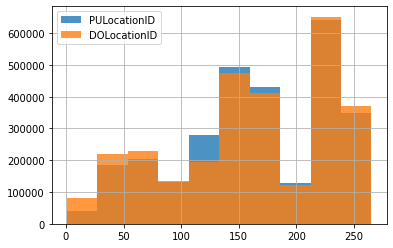

In [27]:
data["PULocationID"].hist(alpha=0.8, legend=True);
data["DOLocationID"].hist(alpha=0.8, legend=True);

terlihat `kesamaan pola distribusi` data Borough `PULocationID` dan `DOLocationID`

In [28]:
#Membuat Variabel Jam Operasi

data['pickup_hour']= data['tpep_pickup_datetime'].dt.hour

In [29]:
#Label proportion N unique < 10

col = ['passenger_count', 'mta_tax', 'improvement_surcharge', 'congestion_surcharge', 'airport_fee']
for i in col:
  print(numerik[i].value_counts(normalize=True)*100)
  print('')

1.0    75.838852
2.0    14.950751
3.0     3.832285
5.0     2.478409
4.0     1.538306
6.0     1.360807
8.0     0.000312
7.0     0.000208
9.0     0.000069
Name: passenger_count, dtype: float64

0.50    99.292393
0.00     0.706117
0.25     0.001282
3.30     0.000104
0.08     0.000035
1.55     0.000035
0.32     0.000035
Name: mta_tax, dtype: float64

0.3    99.973385
0.0     0.026615
Name: improvement_surcharge, dtype: float64

2.50    92.893537
0.00     7.106116
0.75     0.000243
2.75     0.000069
1.00     0.000035
Name: congestion_surcharge, dtype: float64

0.00    93.947723
1.25     6.052277
Name: airport_fee, dtype: float64



/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

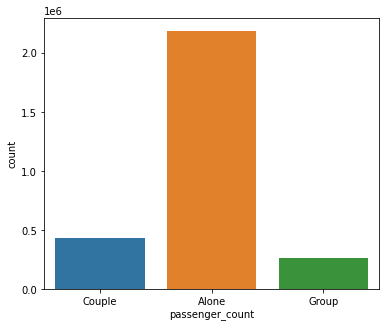

In [30]:
#Passenger Count [penggabungan label dengan proporsi kecil = group]

def pass_label(x):
    if x==1:
        return "Alone"
    elif x==2:
        return "Couple"
    else:
        return 'Group'

data['passenger_count'] = data['passenger_count'].apply(pass_label)

#Delete Uninformation variable [tidak seimbang]
col = ['mta_tax', 'improvement_surcharge', 'congestion_surcharge', 'airport_fee', 'fare_amount']
data.drop(col,axis=1,inplace=True)

#Plot Passenger Count
plt.figure(figsize=(6,5))
sns.countplot(data['passenger_count'])
plt.xticks(rotation='0')

##distribusi data kategorik

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

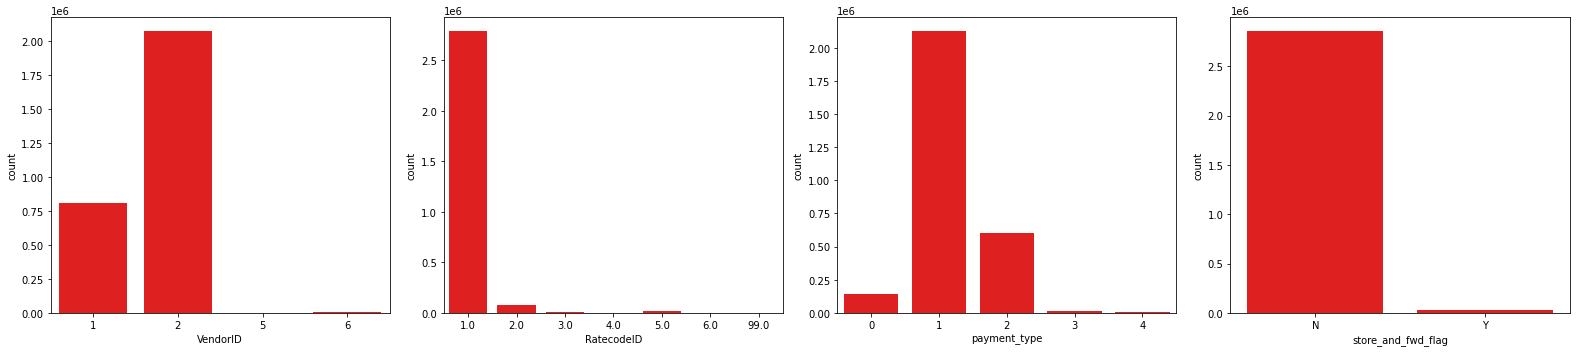

In [31]:
col_cat = kategorik.columns

plt.figure(figsize=(22,5))
for i in range(0,len(col_cat)):
  plt.subplot(1,4,i+1)
  sns.countplot(kategorik[kategorik.columns[i]],color='red')
  plt.tight_layout()

In [32]:
for i in col_cat:
  print(kategorik[i].value_counts(normalize=True)*100)
  print('')

2    71.758372
1    27.908427
6     0.332716
5     0.000485
Name: VendorID, dtype: float64

1.0     96.528362
2.0      2.624443
5.0      0.481938
3.0      0.193441
4.0      0.112904
99.0     0.058081
6.0      0.000832
Name: RatecodeID, dtype: float64

1    73.577552
2    20.796904
0     4.853376
3     0.408159
4     0.364009
Name: payment_type, dtype: float64

N    98.894076
Y     1.105924
Name: store_and_fwd_flag, dtype: float64



In [33]:
#Vendor ID [hapus label 6 dan 5]
data = data[(data["VendorID"] != 6) & (data["VendorID"] != 5)]

#Ratecode ID [1 = standartrate, selain 1 = Unstandartrate]
data['RatecodeID'] = data['RatecodeID'].apply(lambda x:'Unstandartrate' if x > 1 else 'standartrate')

#Payment Type [selain 2 = others]
data['payment_type'].replace({1:'Credit card',
                              2:'Cash',
                              0:'Others',
                              3:'Others',
                              4:'Others',},inplace=True)

#Store and Fwd Flag [rename label]
data['store_and_fwd_flag'].replace({'N':'Order', 'Y':'Cancel'},inplace=True)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

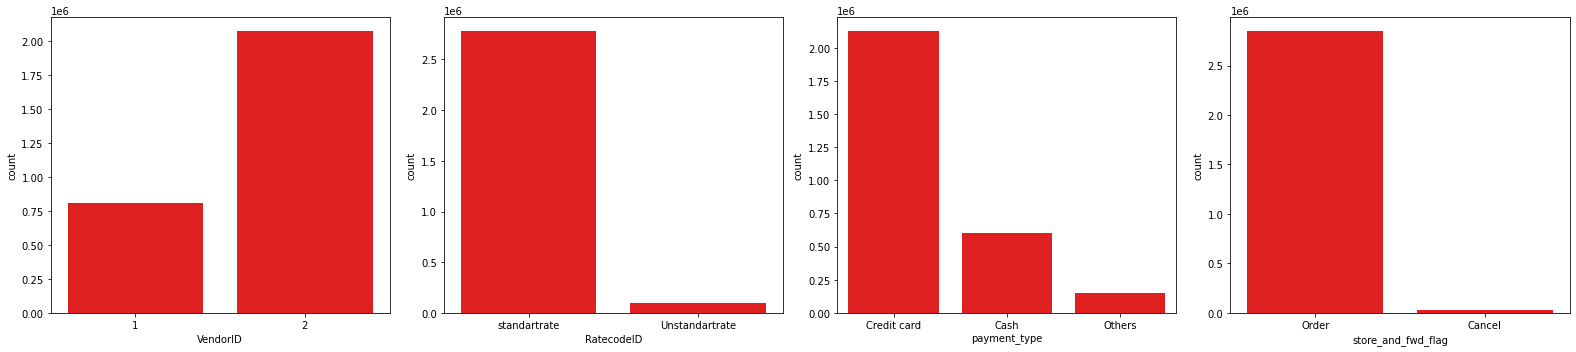

In [34]:
kategorik = data[['VendorID','RatecodeID','payment_type','store_and_fwd_flag']]
col_cat = kategorik.columns

plt.figure(figsize=(22,5))
for i in range(0,len(col_cat)):
  plt.subplot(1,4,i+1)
  sns.countplot(kategorik[kategorik.columns[i]],color='red')
  plt.tight_layout()

`mengubah variabel datetime PickUp dan DropOff dalam label waktu`

In [35]:
import datetime

def timezone(x):
    if x>=datetime.time(0, 0, 1) and x <=datetime.time(10, 0, 0):
        return 'pagi'
    elif x>=datetime.time(10, 0, 1) and x <=datetime.time(15, 0, 0):
        return 'siang'
    elif x>=datetime.time(15, 0, 1) and x <=datetime.time(17, 0, 0):
        return 'sore'
    elif x>=datetime.time(17, 0, 1) and x <=datetime.time(23, 59, 59):
        return 'malam'
    
data['tpep_pickup_timezone']= data['tpep_pickup_datetime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()))
data['pickup_day']= data['tpep_pickup_datetime'].dt.day_name()

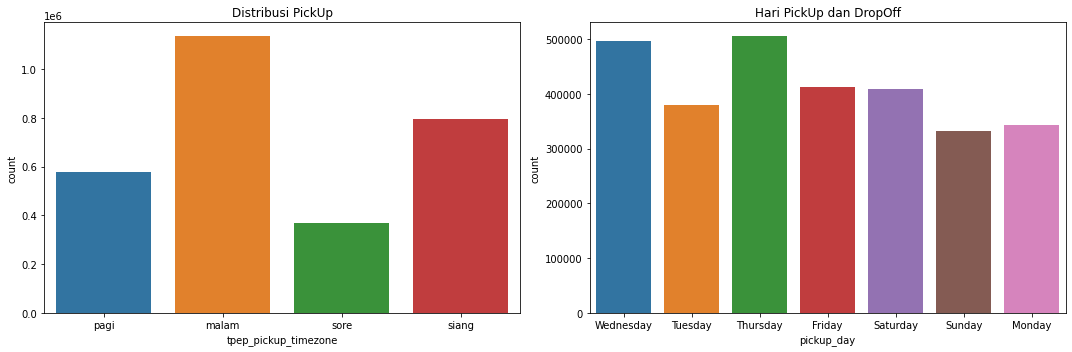

In [36]:
#Plot PickUp dan DropOff Timezone

figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,5))

sns.countplot(x='tpep_pickup_timezone',data=data,ax=ax[0])
ax[0].set_title('Distribusi PickUp',fontsize="12")

sns.countplot(x='pickup_day',data=data,ax=ax[1])
ax[1].set_title('Hari PickUp dan DropOff',fontsize="12")
plt.tight_layout()

##Univariat

In [37]:
numerik = data.select_dtypes(include=np.number).drop(['VendorID'],axis=1)
kategorik = pd.concat([data.select_dtypes(exclude=np.number),data['VendorID']],axis=1).drop(['tpep_pickup_datetime','tpep_dropoff_datetime'],axis=1)
data = pd.concat([numerik,kategorik],axis=1)

In [38]:
numerik_eda = numerik
kategorik_eda = kategorik
data_eda = data

*distribusi data numerik*

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

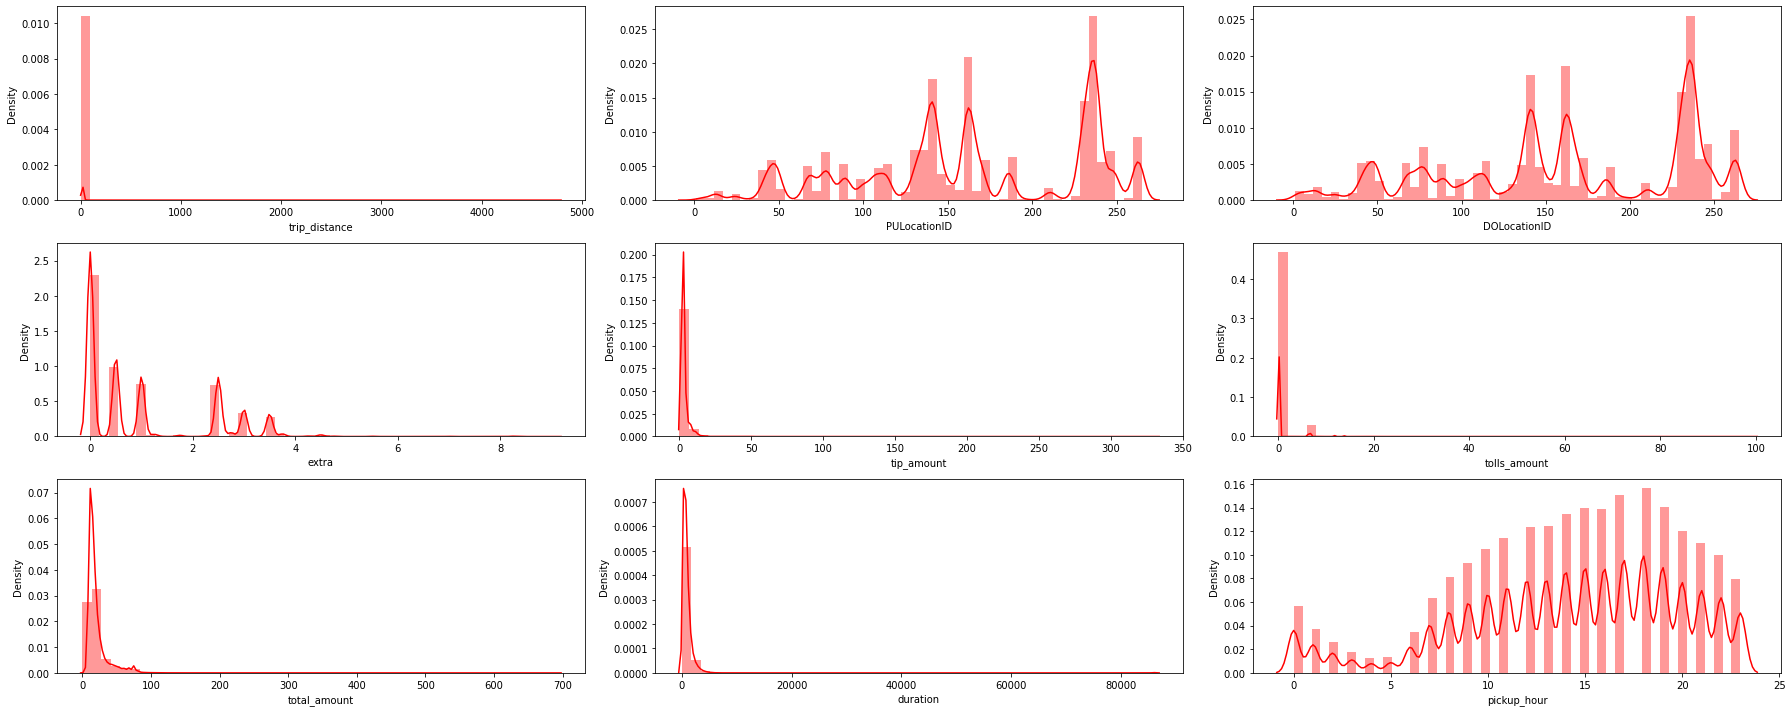

In [39]:
col_num = numerik.columns

plt.figure(figsize=(25,10))
for i,j in enumerate(col_num):
  plt.subplot(3,3,i+1)
  sns.distplot(numerik[j],color='red')
  plt.tight_layout()

*check outlier*

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("V

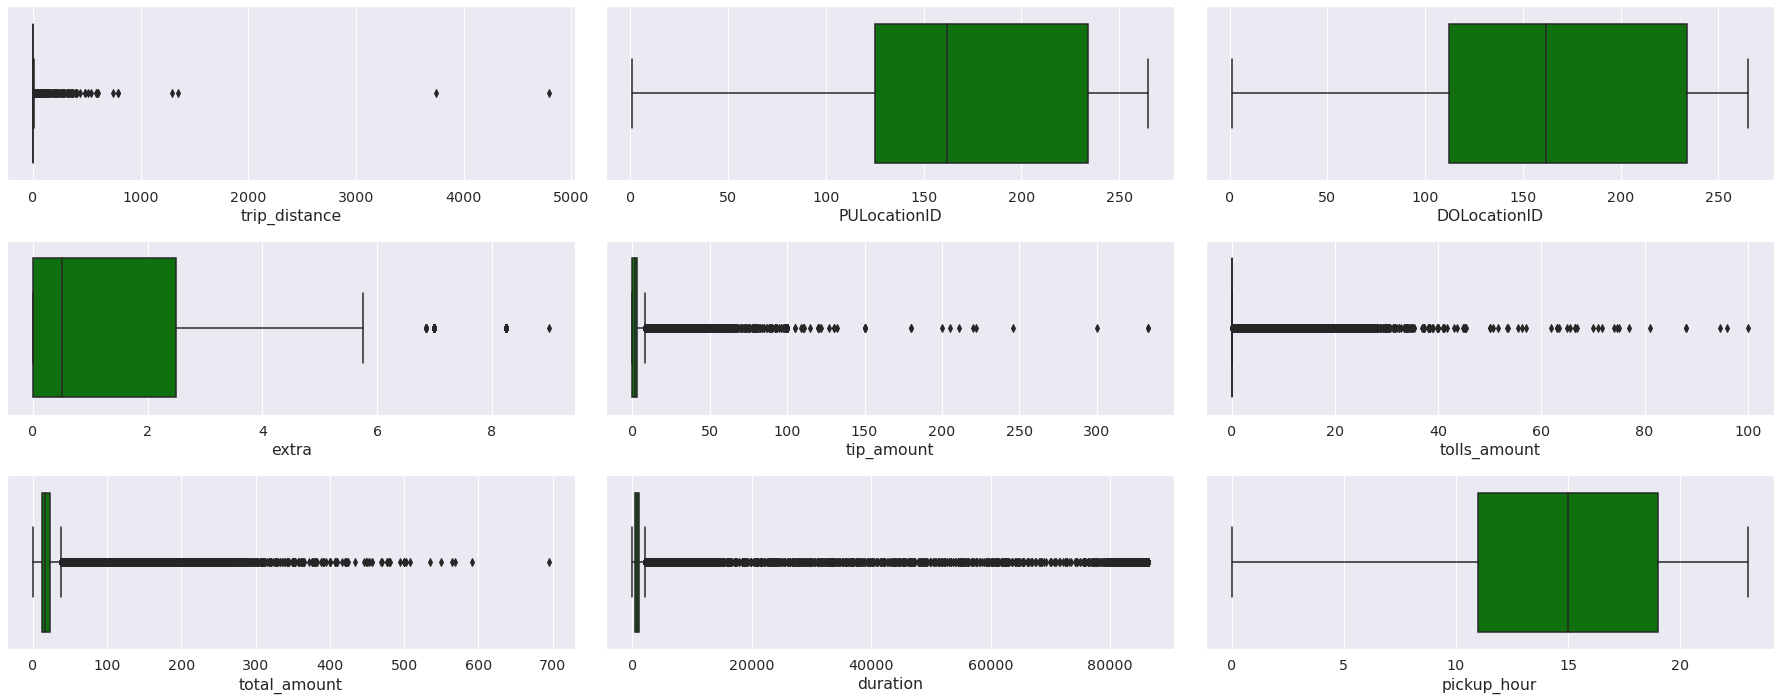

In [40]:
plt.figure(figsize=(25,10))
sns.set(font_scale=1.3)
for i in range(0,len(numerik.columns)):
  plt.subplot(3,3,i+1)
  sns.boxplot(numerik[numerik.columns[i]],color='green',orient="v")
  plt.tight_layout()

*distribusi data kategorik*

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

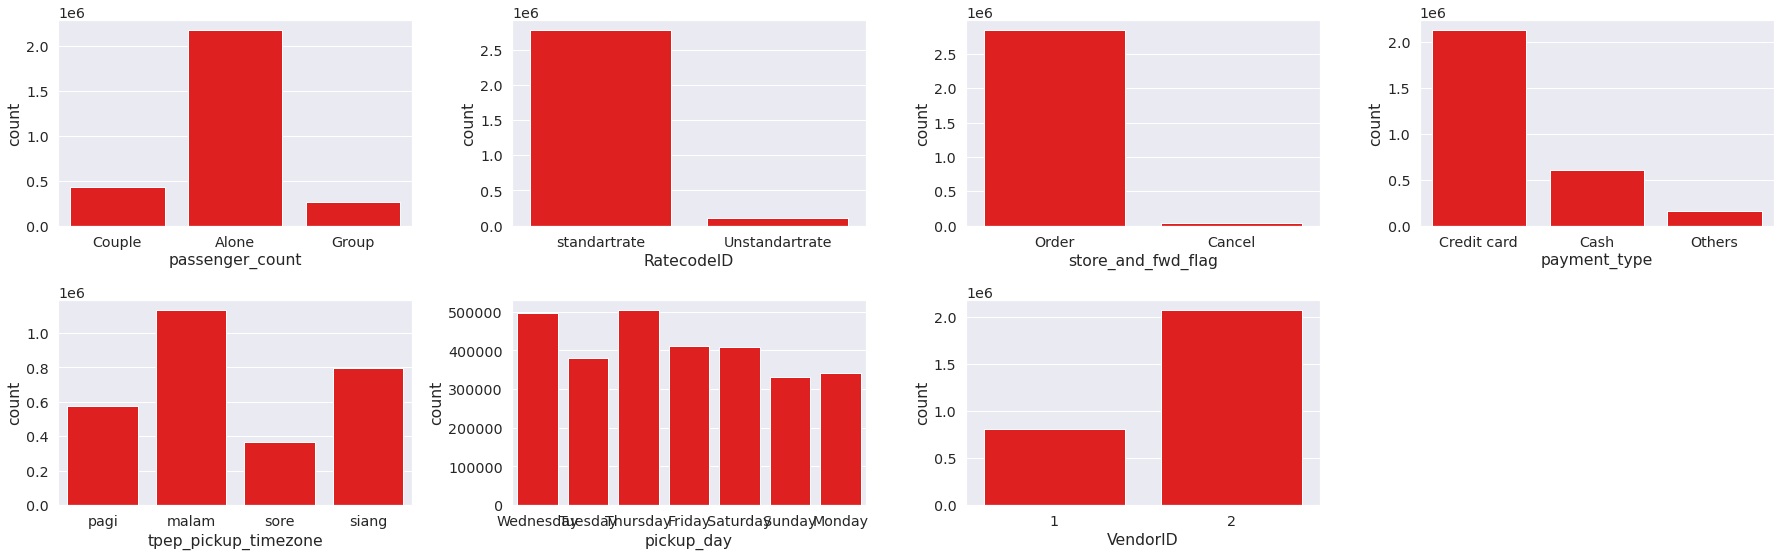

In [41]:
col_cat = kategorik.columns

plt.figure(figsize=(25,8))
for i in range(0,len(col_cat)):
  plt.subplot(2,4,i+1)
  sns.countplot(kategorik[kategorik.columns[i]],color='red')
  plt.tight_layout()

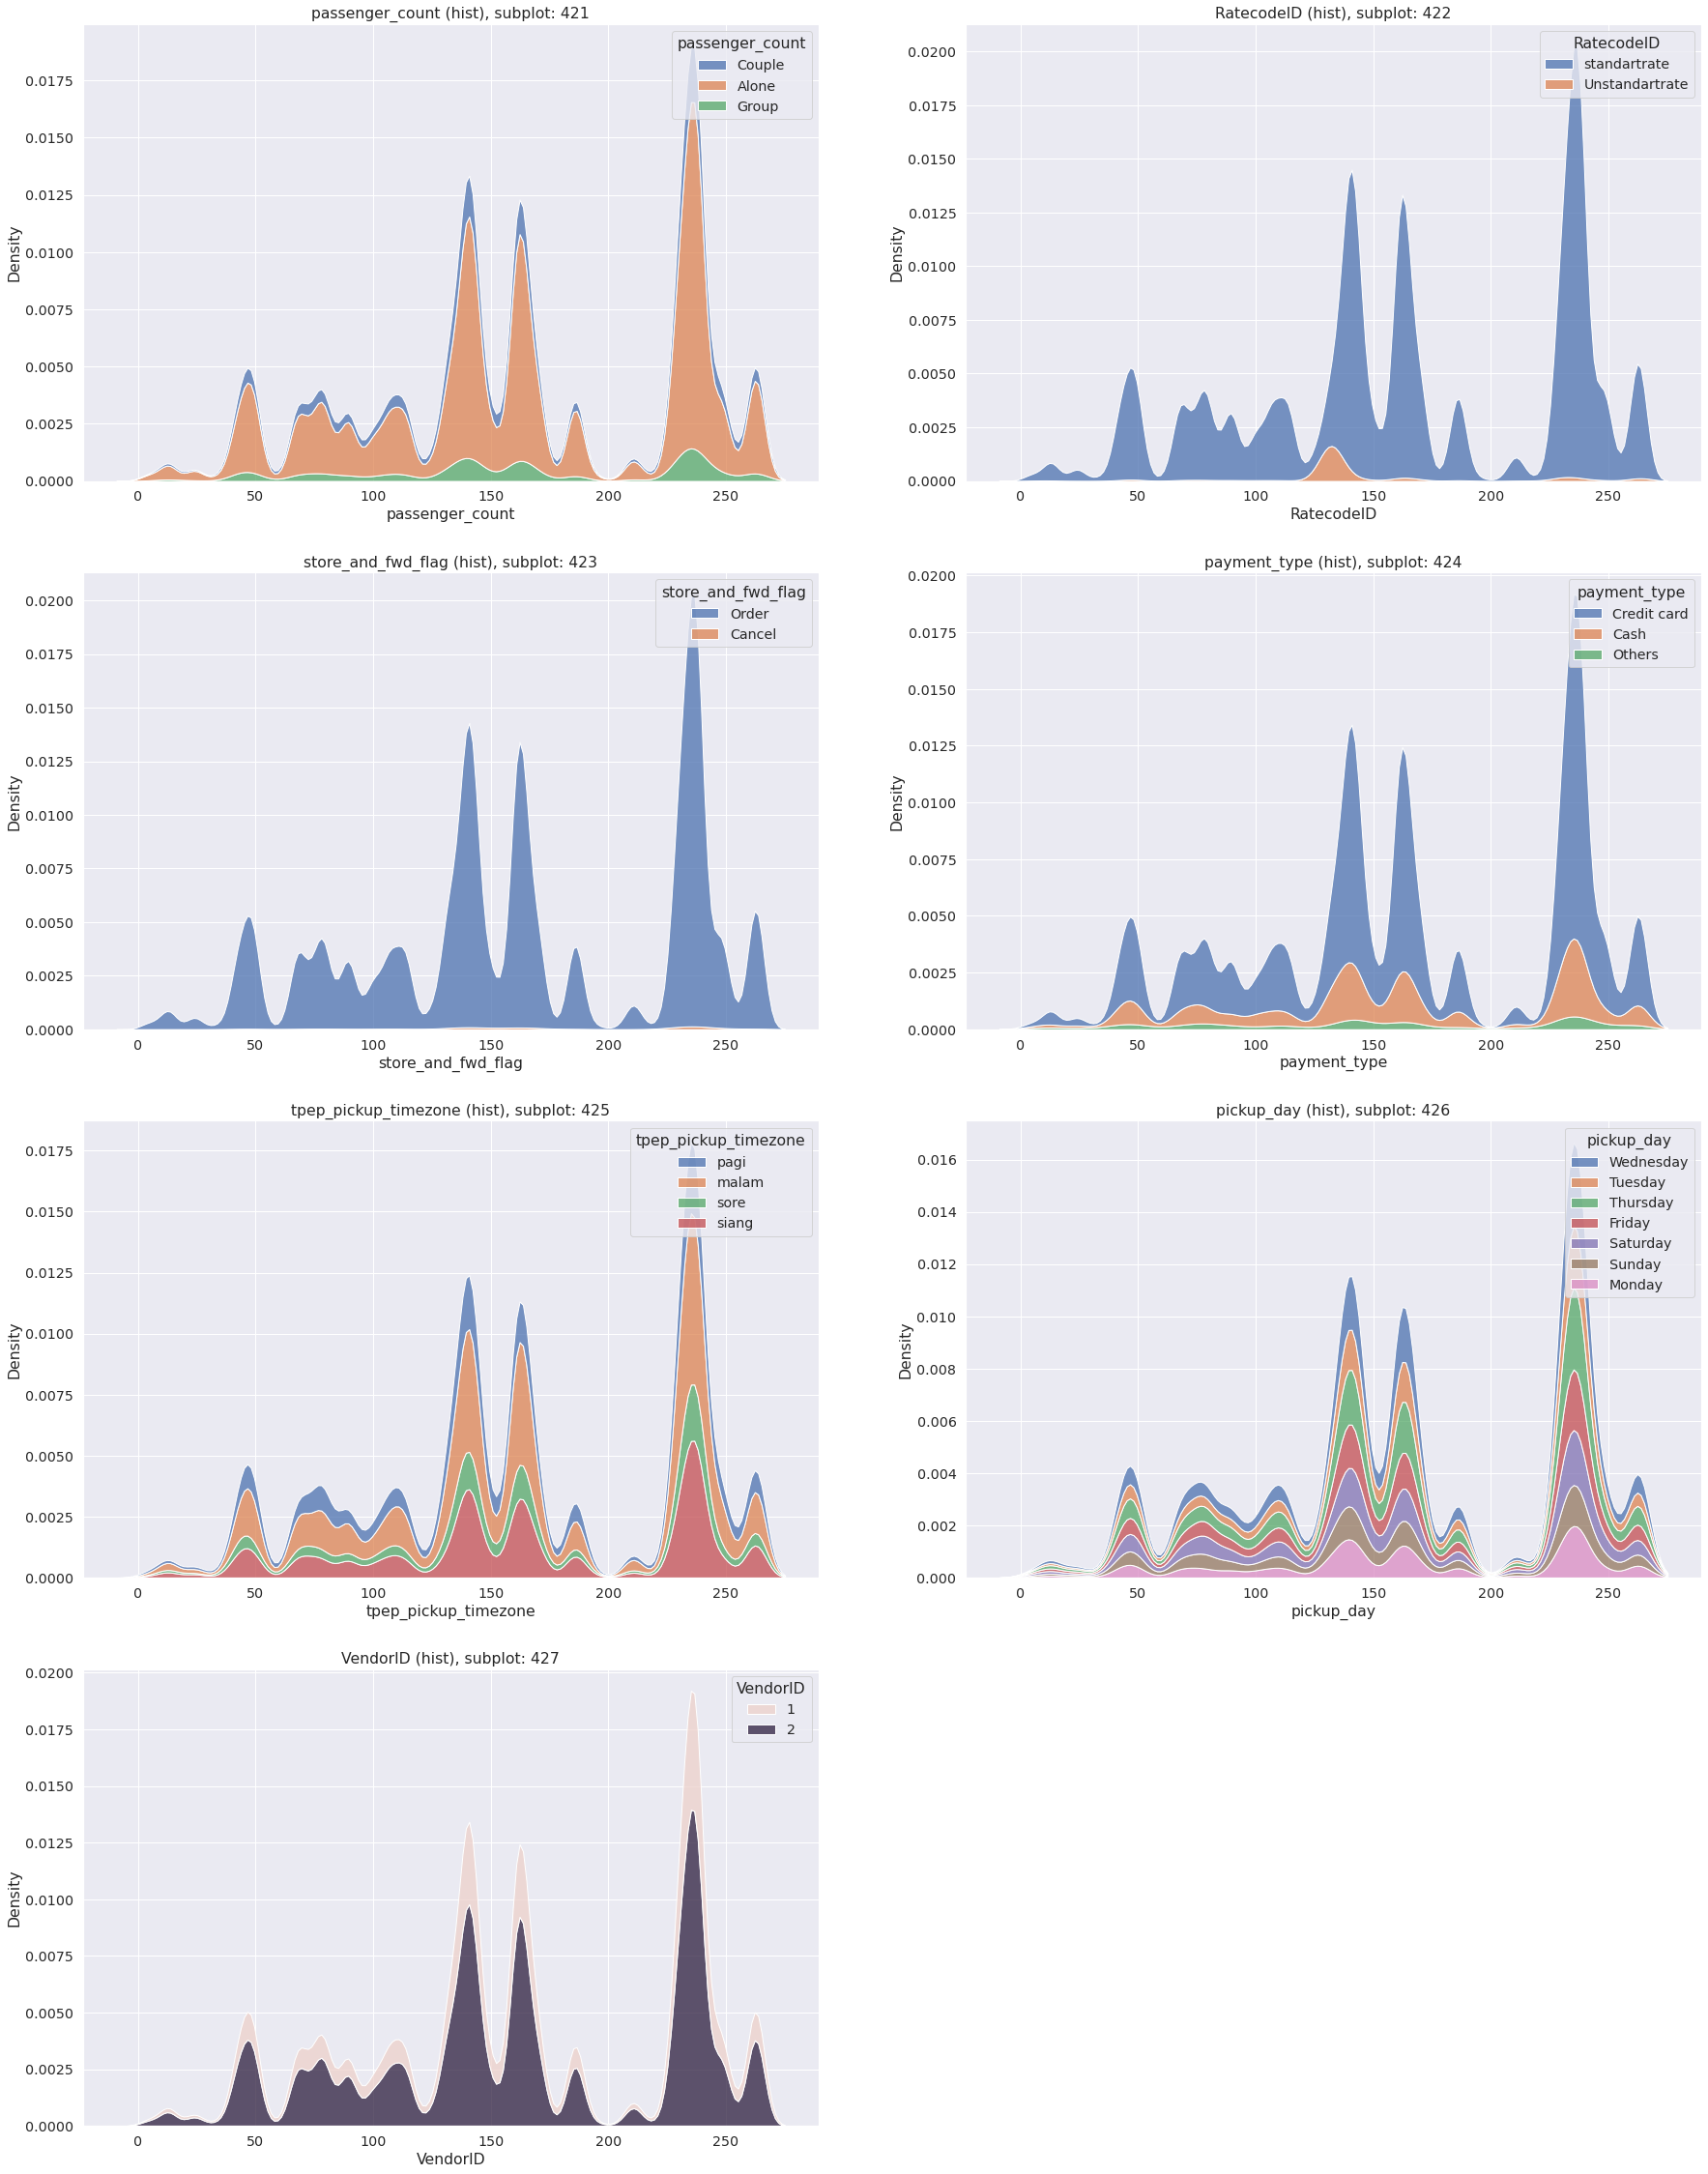

In [42]:
col = kategorik.columns
df = data

a = 4
b = 2
c = 1

fig = plt.figure(figsize=(30,40))
for i in col:
    plt.subplot(a, b, c)
    plt.title('{} (hist), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.kdeplot(data=df, x='PULocationID', hue=i, multiple="stack")
    c = c + 1

plt.show()

##Bivariat

`PULocationID ~ numerik`

In [43]:
from sklearn.feature_selection import f_regression,f_classif,SelectKBest,mutual_info_classif
from matplotlib import pyplot

X = numerik.drop('PULocationID',axis=1)
y = numerik['PULocationID']

f_val, p_val = f_regression(X,y)

print('variabel yang tidak signifikan antara lain',np.where(p_val>0.05))

variabel yang tidak signifikan antara lain (array([], dtype=int64),)


Fvalue variabel 0 trip_distance sebesar 18250.034092666774
Fvalue variabel 1 DOLocationID sebesar 17883.595590767396
Fvalue variabel 2 extra sebesar 131.52139007487972
Fvalue variabel 3 tip_amount sebesar 4226.9707635226105
Fvalue variabel 4 tolls_amount sebesar 11115.461609277683
Fvalue variabel 5 total_amount sebesar 25320.181387892044
Fvalue variabel 6 duration sebesar 1227.5301677484222
Fvalue variabel 7 pickup_hour sebesar 875.2244096267752



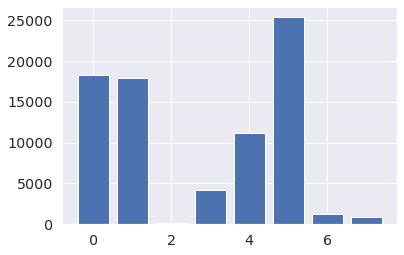

In [44]:
for i,j in enumerate(X.columns):
  print('Fvalue variabel {} {} sebesar {}'.format(i,j,f_val[i]))

print('')
pyplot.bar([i for i in range(len(f_val))], f_val)
pyplot.show()

*semua prediktor numerik signifikan terhadap variabel PULocationID*

`PULocationID ~ kategorik`

In [45]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model1 = ols("PULocationID ~ passenger_count", data=data).fit()
print(sm.stats.anova_lm(model1, typ=2))

model2 = ols("PULocationID ~ RatecodeID", data=data).fit()
print(sm.stats.anova_lm(model2, typ=2))

model3 = ols("PULocationID ~ store_and_fwd_flag", data=data).fit()
print(sm.stats.anova_lm(model3, typ=2))

model4 = ols("PULocationID ~ payment_type", data=data).fit()
print(sm.stats.anova_lm(model4, typ=2))

model5 = ols("PULocationID ~ tpep_pickup_timezone", data=data).fit()
print(sm.stats.anova_lm(model5, typ=2))

model6 = ols("PULocationID ~ pickup_day", data=data).fit()
print(sm.stats.anova_lm(model6, typ=2))

model7 = ols("PULocationID ~ VendorID", data=data).fit()
print(sm.stats.anova_lm(model7, typ=2))

                       sum_sq         df          F        PR(>F)
passenger_count  4.411184e+05        2.0  50.342021  1.371263e-22
Residual         1.260048e+10  2876023.0        NaN           NaN
                  sum_sq         df            F  PR(>F)
RatecodeID  3.530884e+07        1.0  8081.509911     0.0
Residual    1.256561e+10  2876024.0          NaN     NaN
                          sum_sq         df          F        PR(>F)
store_and_fwd_flag  1.885310e+05        1.0  43.030828  5.389313e-11
Residual            1.260073e+10  2876024.0        NaN           NaN
                    sum_sq         df            F  PR(>F)
payment_type  2.945571e+07        2.0  3369.349598     0.0
Residual      1.257146e+10  2876023.0          NaN     NaN
                            sum_sq         df            F  PR(>F)
tpep_pickup_timezone  2.562999e+07        3.0  1953.923444     0.0
Residual              1.257482e+10  2875954.0          NaN     NaN
                  sum_sq         df           

*semua prediktor kategorik signifikan terhadap variabel PULocationID*

##Multivariat

<ipython-input-80-80bcee4d1487>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


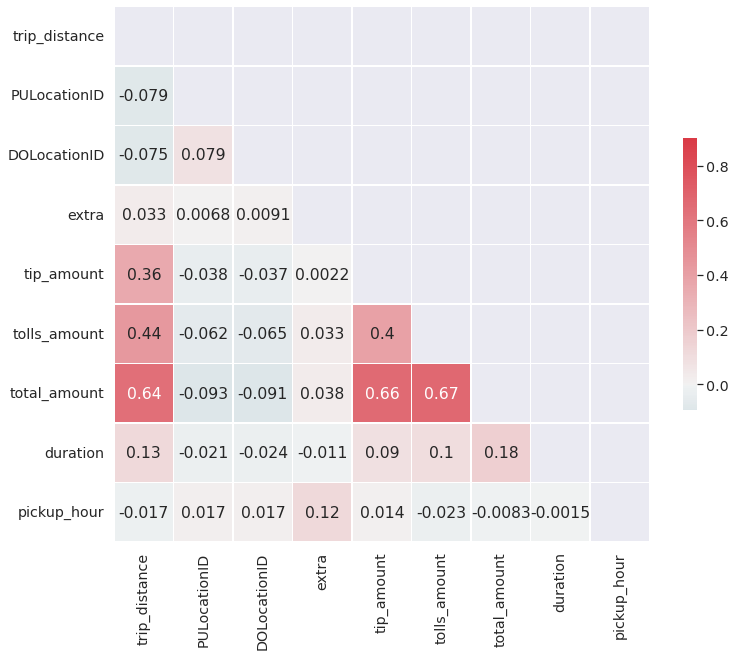

In [80]:
corr = numerik.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0, annot=True, square=True, linewidths=.5, cbar_kws={"shrink": .5})

*Korelasi < 0.8 maka semua variabel digunakan dalam model*

#Data Preparation

##one-hot encoding

In [47]:
kategorik_col = kategorik.columns.tolist()

kategorik = pd.get_dummies(data[kategorik_col], drop_first=True)

## partisi data

In [48]:
from sklearn.model_selection import train_test_split

dataset = pd.concat([numerik,kategorik],axis=1)

X = dataset.drop('total_amount', axis = 1)
y = dataset['total_amount']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=123)

## transformation

In [49]:
from sklearn.preprocessing import FunctionTransformer

num = data.select_dtypes(include=np.number).drop(['VendorID','total_amount'],axis=1)
col_log = num.columns

#Log Transformation
X_train.loc[:, col_log] = np.log1p(X_train.loc[:, col_log])
X_test.loc[:, col_log] = np.log1p(X_test.loc[:, col_log])

#Modelling

In [50]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn import metrics

In [51]:
Linearregresi = LinearRegression()
Linearregresi.fit(X_train, y_train)
y_pred_lr = Linearregresi.predict(X_train)
y_pred_lr_test = Linearregresi.predict(X_test)

Ridgeregresi = Ridge()
Ridgeregresi.fit(X_train, y_train)
y_pred_rr = Ridgeregresi.predict(X_train)
y_pred_rr_test = Ridgeregresi.predict(X_test)

Lassoregresi = Lasso()
Lassoregresi.fit(X_train, y_train)
y_pred_ls = Lassoregresi.predict(X_train)
y_pred_ls_test = Lassoregresi.predict(X_test)

ElasticNetregresi = ElasticNet()
ElasticNetregresi.fit(X_train, y_train)
y_pred_en = ElasticNetregresi.predict(X_train)
y_pred_en_test = ElasticNetregresi.predict(X_test)

In [52]:
algorithm = ['LinearRegression','RidgeRegression','LassoRegression','ElasticNetRegression']
pred_train = [y_pred_lr, y_pred_rr, y_pred_ls, y_pred_en]
pred_test = [y_pred_lr_test, y_pred_rr_test, y_pred_ls_test, y_pred_en_test]

train_set_mae = []
test_set_mae = []

for i in pred_train:
  train_set_mae.append(metrics.mean_absolute_error(y_train, i))

for i in pred_test:
  test_set_mae.append(metrics.mean_absolute_error(y_test, i))

n = list(zip(algorithm, train_set_mae, test_set_mae))
pd.DataFrame(n, columns = ['Model','MAE Train', 'MAE Test']).sort_values(['MAE Train'],ascending=False)

,Model,MAE Train,MAE Test
3,ElasticNetRegression,5.057353,5.066501
2,LassoRegression,3.670932,3.685165
0,LinearRegression,2.901510,2.907711
1,RidgeRegression,2.901507,2.907708


`check overfitting`

In [75]:
models = [LinearRegression(), Lasso(alpha=1e-4), Ridge(alpha=1e-4), ElasticNet(alpha=1e-4)]
MAEtest = []
MAEtrain = []
R2test = []
R2train = []

for reg in models:
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    y_pred_train = reg.predict(X_train)

    #check overfitting
    R2test.append(reg.score(X_test,y_test))
    R2train.append(reg.score(X_train,y_train))

    #check error
    MAEtest.append(metrics.mean_absolute_error(y_test,y_pred))
    MAEtrain.append(metrics.mean_absolute_error(y_train,y_pred_train))

In [76]:
n = list(zip(models, MAEtest, MAEtrain, R2test, R2train))
pd.DataFrame(n, columns = ['Model','MAE_test', 'MAE_train', 'R2_test','R2_train']).sort_values(['MAE_test'],ascending= True)

,Model,MAE_test,MAE_train,R2_test,R2_train
3,ElasticNet(alpha=0.0001),2.907404,2.901203,0.821630,0.824977
1,Lasso(alpha=0.0001),2.907669,2.901465,0.821635,0.824977
2,Ridge(alpha=0.0001),2.907711,2.901510,0.821635,0.824977
0,LinearRegression(),2.907711,2.901510,0.821635,0.824977


**terlihat bahwa `Keempat Model Linear mampu meminimumkan tingkat overfitting`**

*tetapi akan dipilih elastic net karena MAE lebih kecil*

##Final Model

Feature 0:trip_distance, Score:11.028487817356755
Feature 1:PULocationID, Score:-0.09946303001825117
Feature 2:DOLocationID, Score:-0.4724448513598578
Feature 3:extra, Score:0.9387713806604753
Feature 4:tip_amount, Score:4.956226822726593
Feature 5:tolls_amount, Score:6.566556199676858
Feature 6:duration, Score:0.8714956150679869
Feature 7:pickup_hour, Score:0.17344818079776753
Feature 8:VendorID, Score:1.031891495455902
Feature 9:passenger_count_Couple, Score:-0.01724742208356661
Feature 10:passenger_count_Group, Score:-0.1100520308883341
Feature 11:RatecodeID_standartrate, Score:-24.681621036859543
Feature 12:store_and_fwd_flag_Order, Score:0.018614292409187688
Feature 13:payment_type_Credit card, Score:-3.535880231080577
Feature 14:payment_type_Others, Score:1.8295272317234406
Feature 15:tpep_pickup_timezone_pagi, Score:0.06495873272259683
Feature 16:tpep_pickup_timezone_siang, Score:0.6218633222491988
Feature 17:tpep_pickup_timezone_sore, Score:1.0250338060498023
Feature 18:pickup_

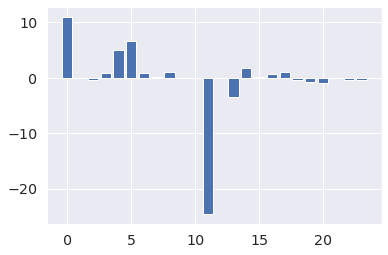

In [71]:
model = ElasticNet(alpha=1e-4)
model.fit(X_train, y_train)
importance = model.coef_

for i,v in enumerate(importance):
  print("Feature {}:{}, Score:{}".format(i,X_train.columns[i],v)) 

pyplot.bar([x for x in range(len(importance))], importance) 
pyplot.show() 

`VARIABEL JARAK TEMPUH, BIAYA TAMBAHAN TOL, TOTAL TIP` menjadi pendukung utama total pembayaran 

##`Kesimpulan`

In [72]:
y_pred = model.predict(X_test)
error = y_pred - y_test

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


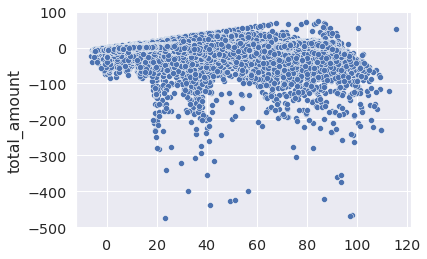

In [73]:
sns.scatterplot(y_pred,error)

`terjadi heteroskedastisitas`

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


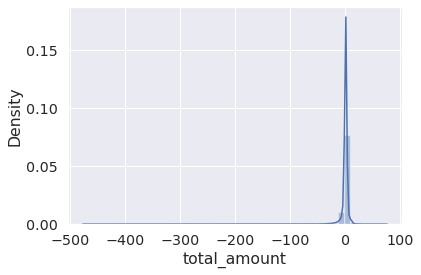

In [74]:
sns.distplot(error)

`terbukti bahwa error berdistribusi normal`